In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_ekb import LV_EKB_Dataset
from optical_flow import LucasKanade
from lv import area2cont 

In [2]:
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', unicode=True)
rc('text.latex', preamble=r'\usepackage[russian]{babel}')

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
data = LV_EKB_Dataset(dataset_path='us_ekb', img_size=(512,512), shuffle=False, normalize=True)

Dataset is correct.


## Изображения упорядочены по видеопоследовательности сердечного сокращения

In [4]:
category = 'Norma'
patient = '02'
imgs, msks = data.get_sequence(patient, category)

Text(0.5, 1.0, '$min = 0.0; max = 1.0$')

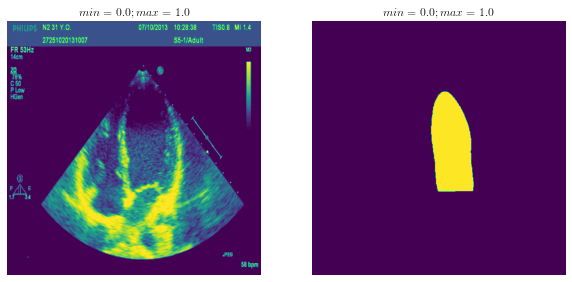

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(imgs[0])
plt.axis('off')
plt.title(r'$min = ' + str(np.min(imgs[0])) + '; max = ' + str(np.max(imgs[0])) + '$')
plt.subplot(122)
plt.imshow(msks[0])
plt.axis('off')
plt.title(r'$min = ' + str(np.min(msks[0])) + '; max = ' + str(np.max(msks[0])) + '$')

# Параметры алгоритма:
- количество гауссовой пирамиды изображения;
- размер окна;
- количество отслеживаемых точек;

In [20]:
lk = LucasKanade(gauss_layers=1, window=61, num_points = 17)
pred_msks, pred_points = lk.predict(imgs, area2cont(msks[0]))

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.


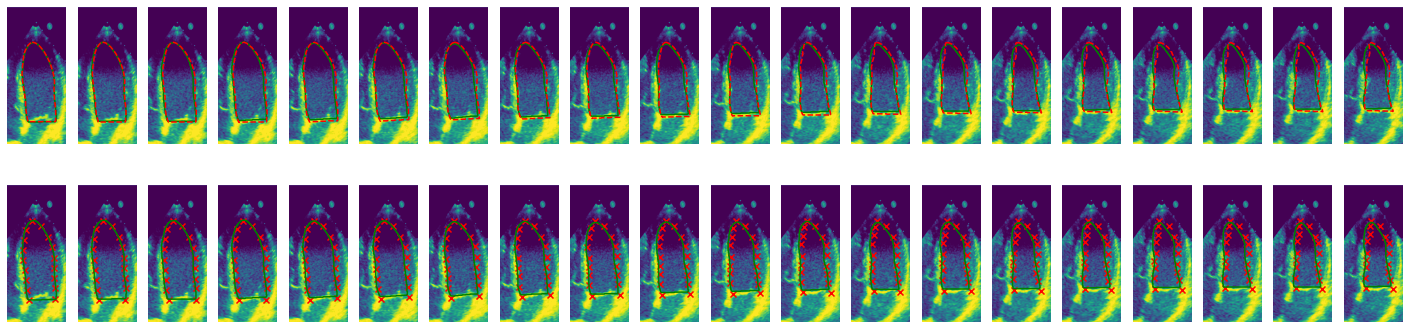

In [23]:
plt.figure(figsize=(25,6))
num_images = 20
for i, (img, msk, p_msk) in enumerate(zip(imgs, msks, pred_msks)):
    if i == num_images: break
    plt.subplot(2,num_images,i+1)
    plt.imshow(img)
    plt.contour(msk, 0, colors = 'g');
    plt.contour(p_msk, 0, colors = 'r', linestyles='dashed');
    plt.xlim(200, 350)
    plt.ylim(50, 400)
    plt.axis('off')
    plt.gca().invert_yaxis()

for i, (img, msk, p_points) in enumerate(zip(imgs, msks, pred_points)):
    if i == num_images: break
    plt.subplot(2,num_images,num_images+i+1)
    plt.imshow(img)
    plt.contour(msk, 0, colors = 'g');
    plt.scatter([p[1] for p in p_points], [p[0] for p in p_points], c='r', marker='x');
    plt.xlim(200, 350)
    plt.ylim(50, 400)
    plt.axis('off')
    plt.gca().invert_yaxis()
    